# Abgabe 3: Schwingungen

**Teammitglieder:** René Zarwel, Matthias Kastenmüller

<br>

Importieren allgemein benötigter Bibliotheken:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab as pylab
import numpy.polynomial.polynomial as poly
import numpy as np
from scipy.integrate import odeint
import math
from numpy import array, polyval, polyfit
import vpython as vp         # get VPython modules for animation
vec=vp.vector

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Aufgabe 1: Gedämpfte Schwingungen

Bei einer harmonischen Schwingung wirkt lediglich die rücktreibende Kraft. Daraus ergibt sich folgenden Schwingungsgleichung:

$$
F = -k \cdot x \quad \text{mit} \quad k=\text{Federkonstante} \\
\omega_0 = \sqrt{\frac{k}{m}}  \quad \text{- Ungedämpfte Eigenkreisfrequenz } \\
\ddot{x} + \omega_0^2 \cdot x = 0
$$

Bei der gedämpften Schwingung wirk zusätzlich zur rücktreibenden Kraft noch eine Reibungskraft $F_R$. So wird die Schwingungsgleichung folgendermaßen erweitert:

$$
F_R = - c \cdot v^n \quad\text{mit}\quad c=\text{Dämpfungskonstante} \quad\text{und}\quad n=\{0,\frac{1}{2}, 1, 2\} \\
\gamma = \frac{c}{2 \cdot m} \quad \text{- Abklingkonstante} \\
\ddot{x} + 2 \cdot \gamma \cdot \dot{x}^n + \omega_0^2 \cdot x = 0
$$

Zur Lösung dieser Differentialgleichung stellen wir folgende Gleichungen auf:

$$
y_1 = x \\
y_2 = \dot{x} \\
\dot{y_1} = y_2 = \dot{x} \\
\dot{y_2} = \ddot{x} = - 2 \cdot \gamma \cdot \dot{x}^n - \omega_0^2 \cdot x
$$

Durch die Bestimmung vom Anfangswerten für $x$ und $\dot{x}=v$ (Anfangswertproblem) können diese nun mittels der ODEINT-Funktion numerisch gelöst werden. Hierfür wurde definiert:
$$
x = 1 \\
\dot{x}=0
$$

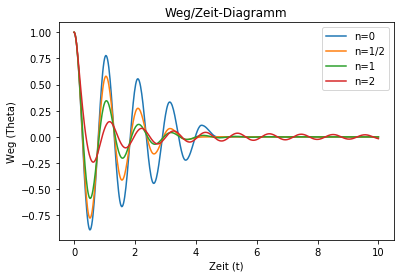

In [2]:
x0 = [1, 0]          # Anfangsbedingungen [x, v]
t = np.linspace(0,10,500)  # 500 Zeitschritte von 0 bis 10s

#Own Sign Func cause np.sign is unstable with odeint
sgn = lambda x: np.tanh(100*x)

#Gleichungssystem für die Differentialgleichung als Funktion
def swing(x,t):
    return[ x[1], -2*gamma*sgn(x[1])*abs(x[1])**n-(omega0**2)*x[0] ]

#Definiton von Konstanten für Schwingfall
omega0 = 6                  
gamma = 1

#Lösung und Plot für n=(0, 1/2, 1, 2)
n=0
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=0")

n=1/2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1/2")

n=1
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1")

n=2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=2")

# Plot Beschriftung
plt.title('Weg/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Weg (Theta)')
plt.legend()

Im obigen Plot ist der Schwingfall dargestellt, bei dem die ungedämpfte Eigenkreisfrequenz größer als die Dämpfungskonstante ist. Man erkennt, dass bei konstanter Dämpfung ( $n=0$ ) die Schwingung auch konstant abnimmt. Bei den anderen Fällen nimmt die Schwingung stärker ab und gleicht einer Parabel ( $ n=\frac{1}{2}$ ), einer e-Funktion ( $n=1$ ) und einer Hyperbel ( $n=2$ ). Besonders interessant ist auch der Fall der zur Geschwindigkeit quadratischen Dämpfung, da dies durch Umwirblungen noch lange weiter schwingt.

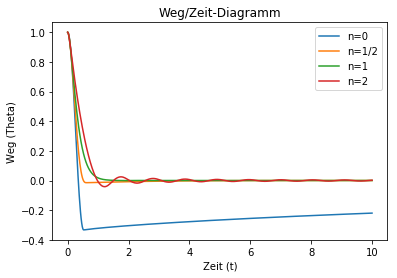

In [3]:
#Definiton von Konstanten für aperiodischen Grenzfall
omega0 = 6                  
gamma = 6

#Lösung und Plot für n=(0, 1/2, 1, 2)

n=0
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=0")

n=1/2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1/2")

n=1
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1")

n=2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=2")

# Plot Beschriftung
plt.title('Weg/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Weg (Theta)')
plt.legend()

Im obigen Plot ist der aperiodische Grenzfall dargestellt, bei dem die ungedämpfte Eigenkreisfrequenz gleich der Dämpfungskonstante ist. In diesem Fall wirkt die Dämpfung so, dass der Ruhezustand möglichst schnell erreicht wird. Dies sieht man an einer schnellen Annäherung an $0$. Lediglich bei $n=2$ besteht noch ein Nachschwingen ähnlich zum vorherigen Beispiel. Interessant ist die konstante Dämpfung. Durch die im Verhältnis zur Dämpfung hohe Startposition $x=1$ kann das herabfallende Objekt nicht optimal gedämpft werden, sodass es sich zunächst an der 0 Position vorbei bewegt. Anschließend bleibt es bei einer ausgeglichenen Position stehen und bewegt sich langsam auf die 0 Position zu.

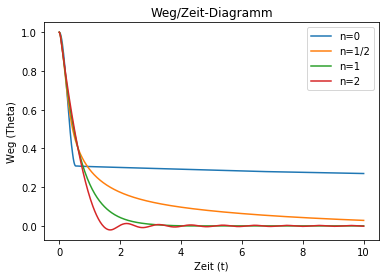

In [4]:
#Definiton von Konstanten für Kriechfall
omega0 = 6                  
gamma = 12

#Lösung und Plot für n=(0, 1/2, 1, 2)

n=0
x = odeint(func=swing, y0=x0, t=t, atol=1e-1)
plt.plot(t, x[:,0], label="n=0")

n=1/2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1/2")

n=1
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1")

n=2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=2")

# Plot Beschriftung
plt.title('Weg/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Weg (Theta)')
plt.legend()

Im obigen Plot ist der Kriechfall dargestellt, bei dem die ungedämpfte Eigenkreisfrequenz kleiner als die Dämpfungskonstante ist. Dies ist daran ersichtlich, dass sich das Objekt durch die starke Dämpfung langsamer als im vorherigen Beispiel auf die 0 Position zu bewegt. Auch hier schwingt im Fall von $n=2$ das Object noch etwas nach und die konstante Dämpfung findet einen Punkt, ab dem sich das Objekt nur noch sehr langsam weiter bewegt. Bei diesem Punkt ist die treibende Kraft der konstanten Dämpfung ausgeglichen.

## Aufgabe 2: Das nichtlineare Pendel I

Es soll folgenden nicht Differentialgleichung für ein nichtlineares Pendel gelöst werden:

$$
\ddot{\theta} + \frac{g}{l} \cdot \sin(\theta) = 0 \\
\text{mit} \quad g=9.81\frac{m}{s^2} \quad \text{und} \quad l=10cm
$$

Ähnlich zur Aufgabe 1 können für die Lösung folgende Gleichungen aufgestellt werden.

$$
y_1 = x \\
y_2 = \dot{x} \\
\dot{y_1} = y_2 = \dot{x} \\
\dot{y_2} = \ddot{x} = -\frac{g}{l} \cdot \sin(\theta)
$$

In [5]:
t = np.linspace(0,1,500)  # 500 Zeitschritte von 0 bis 10s
g = 9.81
l = 0.01

def nlswing(x,t):
    return[ x[1], -g/l*math.sin(x[0]) ]

Durch verschiedene Anfangsauslenkungen $\theta_0$ und die Anfangsgeschwindigkeiten $v_0=0$ wird im folgenden das Verhalten analysiert.

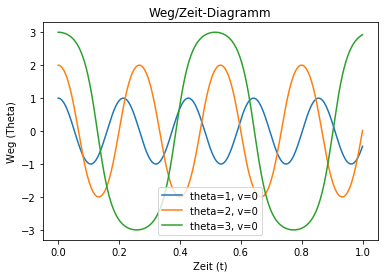

In [6]:
theta0 = [1, 0]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=0")

theta0 = [2, 0]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=2, v=0")

theta0 = [3, 0]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=3, v=0")

# Plot Beschriftung
plt.title('Weg/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Weg (Theta)')
plt.legend()

Im obigen Beispiel ist ersichtlich, dass mit steigender Anfangsauslenkungen natürlich eine längere Schwingdauer in einer Richtung und auch eine entsprechende Auslenkung erreicht wird. Da in diesem Modell keine Reibung berücksichtigt wird, bleibt die Schwingung dauerhaft erhalten.

Im nächsten Beispiel werden Grenzfälle analysiert.

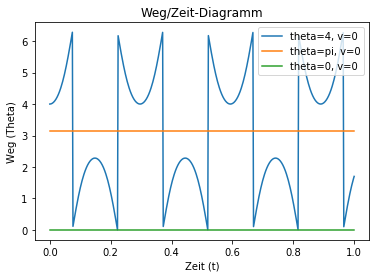

In [7]:
theta0 = [4, 0]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, [math.fmod(t, 2*math.pi) for t in theta[:,0]], label="theta=4, v=0")

theta0 = [math.pi, 0]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t,theta[:,0], label="theta=pi, v=0")

theta0 = [0, 0]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t,theta[:,0], label="theta=0, v=0")

# Plot Beschriftung
plt.title('Weg/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Weg (Theta)')
plt.legend()

Im obigen Beispiel sind für die Anfangsauslenkung die Ruhepositionen beim Winkel $\theta=0$ und beim senkrechten Stand mit $\theta=\pi$ dargestellt. Hier bleibt die Position erhalten, da sich die Kräfte in beiden Positionen ausgleichen. In der Praxis wäre dies nur schwer zu erreichen, da durch äußere Einflüsse, gerade beim senkrachtend Stand nach Oben, die Ruhe schnell gekippt werden würde.

Zusätzlich ist noch ein Fall dargestellt, bei dem die Anfangsauslenkung über die höchste Position $\theta=\pi$ gezogen wurde. Dies verhält sich jedoch ähnlich zu dem Fall, dass das Pendel an die gleiche Position bloß einfach in die entgegengesetzte Richtung hochgezogen würde. Durch einfaches verschieben der Kurven würde die normale Schwingung dargestellt werden.

Im nächsten Beispiel sind verschiedene Anfangsgeschwindigkeiten dargestellt:

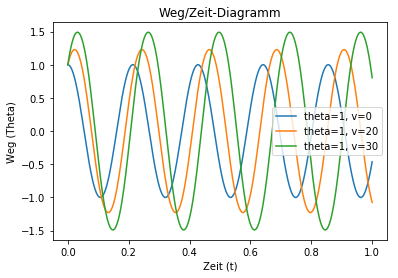

In [8]:
theta0 = [1, 0]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=0")

theta0 = [1, 20]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=20")

theta0 = [1, 30]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=30")

# Plot Beschriftung
plt.title('Weg/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Weg (Theta)')
plt.legend()

Da die Anfangsgeschwindigkeit nicht 0 ist, bewegt sich das Pendel anfangs noch nach oben. Je höher $v_0$ ist, desto weiter bewegt sich das Pendel nach oben. Nachdem der Höhepunkt erreicht wurde, verhält sich das Pendel so, als hätte man es am Höhepunkt ohne Anfangsgeschwindigkeit losgelassen.

Im nächsten Plot sind wieder interessante Verhalten für besondere Anfangsgeschwindigkeiten zu sehen:

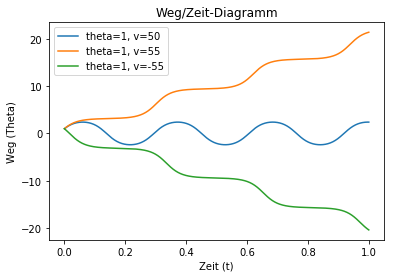

In [9]:
theta0 = [1, 50]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=50")

theta0 = [1, 55]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=55")

theta0 = [1, -55]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=-55")

# Plot Beschriftung
plt.title('Weg/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Weg (Theta)')
plt.legend()

Bis zu einer Anfangsgeschwindigkeit von etwa 50m/s kommt das Pendel noch vor dem senkrechtend Stand mit $\theta=\pi$ zum stehen und kommt in den Schwingfall. Wenn die Geschwindigkeit höher gewählt wird, wird die höchste Position überlaufen und das Pendel dreht sich in einer Richtung im Kreis. Dies ist daran zu erkennen, dass der Winkel nicht um den Null-Punkt schwingt. Der Dargestellte Winkel ist somit die Anzahl an Umdrehungen, die das Pendel schon absolviert hat.

Im folgenden ist noch der Phasenraum für verschiedene bereits oben dargestellte Anfangspositionen geplottet.

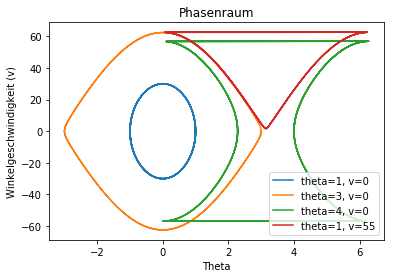

In [10]:
theta0 = [1, 0]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot([math.fmod(t,2*math.pi) for t in theta[:,0]], theta[:,1], label="theta=1, v=0")

theta0 = [3, 0]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot([math.fmod(t,2*math.pi) for t in theta[:,0]], theta[:,1], label="theta=3, v=0")

theta0 = [4, 0]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot([math.fmod(t,2*math.pi) for t in theta[:,0]], theta[:,1], label="theta=4, v=0")

theta0 = [1, 55]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot([math.fmod(t,2*math.pi) for t in theta[:,0]], theta[:,1], label="theta=1, v=55")

# Plot Beschriftung
plt.title('Phasenraum')
plt.xlabel('Theta')
plt.ylabel('Winkelgeschwindigkeit (v)')
plt.legend()

## Aufgabe 3: Erzwungene Schwingung

Zunächst werden wird wieder das Gleichungssystem zur Lösung des DGL aufgestellt.

$$
y_1 = x \\
y_2 = \dot{x} \\
\dot{y_1} = y_2 = \dot{x} \\
\dot{y_2} = \ddot{x} = \frac{1}{m}(F_0 \cdot cos{\omega t} -D\dot{x}-cx )
$$

Der Zustand zum Zeitpunkt t = 0 wird festgelegt als:
\begin{align}
\vec{z_0}= \left( \begin{array}{c}x_0\\v_0\end{array} \right) = \left( \begin{array}{c}0\\0\end{array} \right)
\end{align}


Text(0,0.5,'Amplitude')

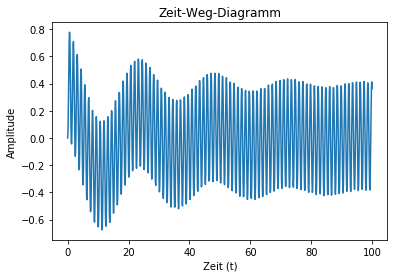

In [343]:
t = np.linspace(0,100, num=1000)

#Definierte Randbedingungen
omega_0 = 5
m = 3
D = 1/omega_0
F0 = 30
c = 0.2

def erzSwing(x,t,om):
    return[ x[1], (F0*math.cos(om*t)-D*x[0]-c*x[1])/m ]


start = [0, 0]   
omega = 5
theta = odeint(func=erzSwing, y0=start, t=t, args=(omega,))
plt.plot(t, theta[:,0])

plt.title('Zeit-Weg-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Amplitude')

Im obigen Bild ist die Einschwingphase gut zu erkennen.

Im folgenden wird die Resonanzkurve berechnet.

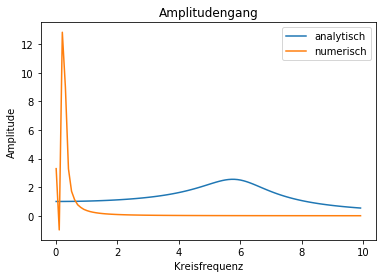

In [342]:
def resAnalytisch(omega):
    n = omega/omega_0
    return 1/np.sqrt((1-n**2)**2+4*(D**2)*(n**2))

def resNum(omega):
    theta = odeint(func=erzSwing, y0=start, t=t, args=(omega,))
    return max([x[0] for x in theta[900:1000]])/F0
    
    
omega_0 = 6
r = np.arange( 0.01, 10, 0.1)
plt.plot(r, resAnalytisch(r),label='analytisch')
plt.plot(r, [resNum(x) for x in r],label='numerisch')


#Plotbeschriftung
plt.title('Amplitudengang')
plt.ylabel('Amplitude')
plt.xlabel('Kreisfrequenz')
plt.legend()

In einem nächsten Schritt wird ein kleinerer nicht linearer Teil hinzugefügt. Alle anderen Werte bleiben identisch.

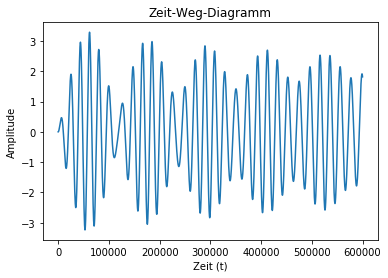

In [13]:
z1=[[0,0]]
z2=[[0,0]]
z3=[[0,0]]

m = 1

dt = 0.00005
D = 4 * math.pi ** 2 * m 
D3= 4 * math.pi ** 2 * m / 20
omega1 = 1 * (2 * math.pi) * 0.97          # (2 * math.pi) => Eine Schwingung pro Sekunde
omega2 = 1 * (2 * math.pi)           # (2 * math.pi) => Eine Schwingung pro Sekunde
F0 = 20
c = 0.1
t = 0.0
tmax = 30
    
def calcNextW(innerz, inneromega):
    dz =   [innerz[-1][1], 1 / m * (F0 * math.cos(inneromega * t) - D * innerz[-1][0] - D3 * innerz[-1][0]**3 - c * innerz[-1][1] )]
    znew = [innerz[-1][0] + dz[0] * dt , innerz[-1][1] + dz[1] * dt]
    innerz.append(znew)

while t < tmax:
    t = t + dt
    calcNextW(z1, omega1);

plt.title('Zeit-Weg-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Amplitude')
plt.plot(range(0,len(z1)), [element[0] for element in z1])

Es ist zu sehen, dass sich die bisherige Schwingung mit dem hinzugefügten Teil überlagert.

## Aufgabe 4: Das nichtlineare Pendel II


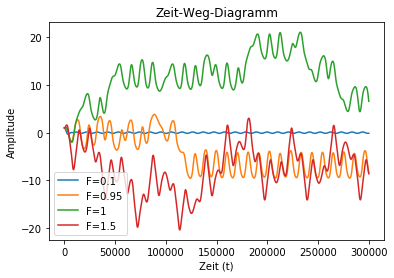

In [14]:
z1=[[1,0]]
z2=[[1,0]]
z3=[[1,0]]
z4=[[1,0]]

dt = 0.001

F1 = 0.1
F2 = 0.95
F3 = 1
F4 = 1.5

t = 0.0
tmax = 300
    
def calcNext(zinner, Finner):
    dz =   [zinner[-1][1], Finner * math.cos(0.6 * t) - 0.5 * zinner[-1][1] - math.sin(zinner[-1][0])]
    znew = [zinner[-1][0] + dz[0] * dt , zinner[-1][1] + dz[1] * dt]
    zinner.append(znew)
    

while t < tmax:
    t = t + dt
    calcNext(z1, F1);
    calcNext(z2, F2);
    calcNext(z3, F3);
    calcNext(z4, F4);
    
plt.plot(range(0,len(z1)), [element[0] for element in z1], label='F=' + str(F1))
plt.plot(range(0,len(z2)), [element[0] for element in z2], label='F=' + str(F2))
plt.plot(range(0,len(z3)), [element[0] for element in z3], label='F=' + str(F3))
plt.plot(range(0,len(z4)), [element[0] for element in z4], label='F=' + str(F4))

plt.title('Zeit-Weg-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Amplitude')
plt.legend()

Für die erste Schwingung (blau) ist zu erkennen, dass sie sehr schnell stabil wird. Das "Einschwingen" ist hier nicht zu erkennen. 
Auch die zweite Kurve (orange) wird nach einiger Zeit stabil. Hier lässt sich jedoch das "Einschwingen" beobachten.

Die beiden anderen Schwingungen erreichen keinen stabilen Zustand. Dies lässt sich daran erkennen, dass in deren Kurve keine Wiederholung zu sehen ist.

Als nächstes wird θ(θ') gebildet. Da der Zustandsvektor bereits den Ort θ sowie die Geschwindigkeit θ' enthällt, ist keine weitere numerische Berechnung notwendig. Die Graphen können direkt gezeichnet werden.

Text(0,0.5,"θ'(θ)")

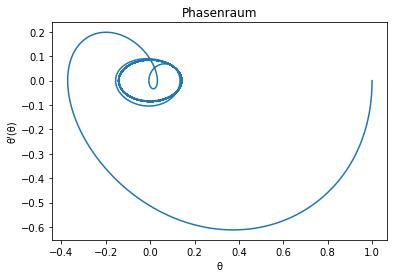

In [15]:
plt.plot([element[0] for element in z1], [element[1] for element in z1])

plt.title('Phasenraum')
plt.xlabel("θ")
plt.ylabel("θ'(θ)")

Wie bereits in oben stehender Graphik zu erkennen ist, erreicht die erste Schwingung äußerst schnell einen stabilen Zustand. (zu erkennen an der Schnellen Konvergenz)

Text(0,0.5,"θ'(θ)")

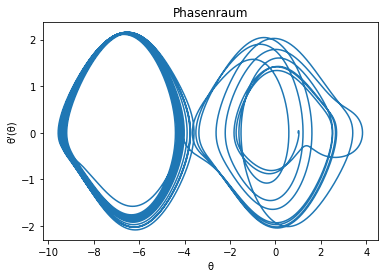

In [16]:
plt.plot([element[0] for element in z2], [element[1] for element in z2])

plt.title('Phasenraum')
plt.xlabel("θ")
plt.ylabel("θ'(θ)")

Auch Schwingung 2 erreicht einen stabilen Zustand. Jedoch wird hierfür mehr Zeit als bei Schwingung 1 benötigt.

Text(0,0.5,"θ'(θ)")

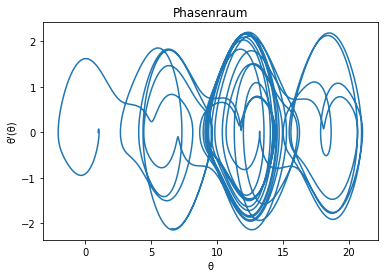

In [17]:
plt.plot([element[0] for element in z3], [element[1] for element in z3])

plt.title('Phasenraum')
plt.xlabel("θ")
plt.ylabel("θ'(θ)")

Text(0,0.5,"θ'(θ)")

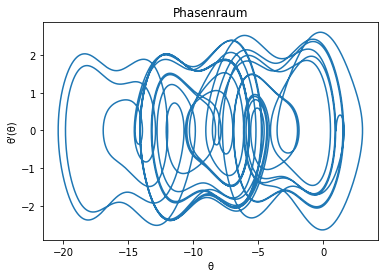

In [18]:
plt.plot([element[0] for element in z4], [element[1] for element in z4])

plt.title('Phasenraum')
plt.xlabel("θ")
plt.ylabel("θ'(θ)")

Auf dem Graph der letzen beiden Schwingungen ist keine Konvergenz zu erkennen.